# Student marks

En este archivo se analiza el [Student Marks Dataset](https://www.kaggle.com/datasets/yasserh/student-marks-dataset) disponible en Kaggle, publicado por Ing. M Yasser H. 

El dataset que se analizará cuenta con 3 columnas.
* number_courses: Número de cursos en los que el alumno en cuestión está enscrito actualmente. Consta de un número entero.
* time_study: Número de horas en promedio que el alumno dedica durante un día al estudio. Consta de un valor de punto flotante.
* Marks: Calificación obtenida por el alumno. Consta de un valor de punto flotante.

En este documento, se pretende hacer un análisis del sesgo, varianza y ajuste de diferentes modelos de regresión polinomial con la finalidad de encontrar el modelo que presente un mejor desempeño de los datos, con el objetivo de comprender la importancia y estrategias de tratamiento de las metricas previamente mencionadas.



## Préambulo
### Importación de librerías

In [175]:
# Librerías de uso general
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Librerías para analisis de datos
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Modelos
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

### Lectura del archivo csv

In [176]:
df = pd.read_csv('Student_Marks.csv')

### Exploración de datos

In [177]:
df.describe()

,number_courses,time_study,Marks
count,100.000000,100.000000,100.000000
mean,5.290000,4.077140,24.417690
std,1.799523,2.372914,14.326199
min,3.000000,0.096000,5.609000
25%,4.000000,2.058500,12.633000
50%,5.000000,4.022000,20.059500
75%,7.000000,6.179250,36.676250
max,8.000000,7.957000,55.299000


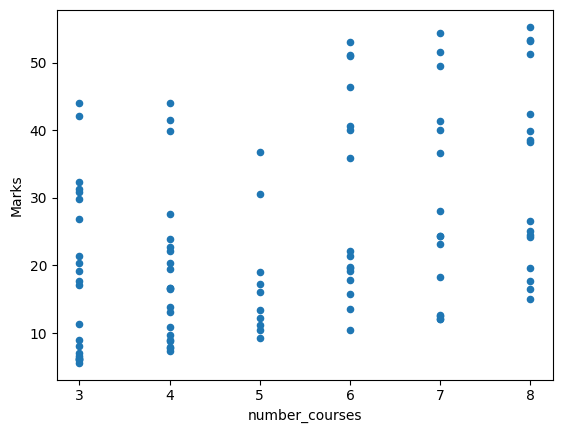

In [178]:
# Graficar el df como scatter plot
df.plot(x='number_courses', y='Marks', kind='scatter')  
plt.show()

En esta gráfica, se muestra el número de cursos contra las calificaciones del alumno. No es posible apreciar una coorrelacón fuerte entre estos datos, además de una leve dentencia hacia una mayor calificación dado un mayor número de cursos, pero no la suficiente como para considerar apropiada la inclusión de esta variable en el análisis.

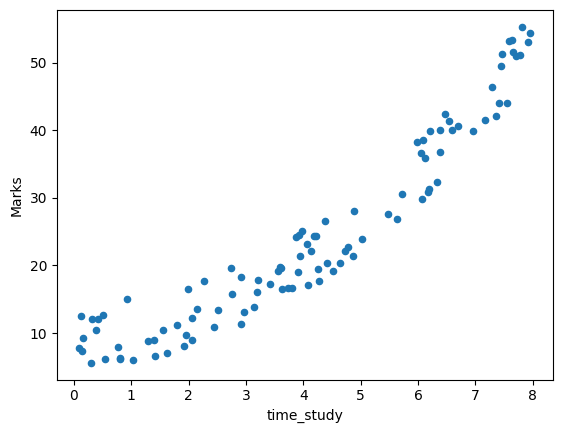

In [179]:
# Graficar el 'time_study' como scatter plot
df.plot(x='time_study', y='Marks', kind='scatter')  
plt.show()

A diferencia de el número de cursos, el tiempo de estudio parece estar fuertemente relacionado con las calificaciones del estudiante. Parece apreciarse una relación lineal, por lo que a continuación se aplicará un algoritmo de regresión lineal con la finalidad de generar un modelo que se ajuste al comportamiento de los datos.

### Partición de los datos

Se divide el conjunto de datos en dos subconjuntos para el entrenamiento y prueba de los modelos generados. Con la finalidad de ser equitativo en las pruebas, se emplean los mismos conjuntos de datos para el entrenamiento y prueba de ambos modelos.

In [180]:
time_study = np.array(df["time_study"])
marks = np.array(df["Marks"])

train_features, test_features, train_targets, test_targets = train_test_split(time_study, marks, test_size = 0.20, random_state = 42)
train_features = train_features.reshape(-1, 1)
test_features = test_features.reshape(-1, 1)

## Rasgos del análisis 

### Sesgo

El sesgo (o bias) se refiere a la tendencia con la que el modelo comete errores al realiar predicciones sobre el conjunto de datos. El sesgo se introduce en el modelo como un producto de la simplifiación de problemas complejos en modelos "simples", el sesgo de un modelo nos habla sobre la manera en la que el modelo se equivoca en comparación a los datos observados, esto puede referirse a la tendencia a sobreestimar el valor real (sesgo de sobreestimación), a subestimar el valor real (sesgo de sobreestimación) o incluso hacer referencia a que el modelo empelado no es el adecuado para describir el comportamiento de los datos.

Un modelo con un sesgo alto puede conducir a problemas de *underfitting*, en los que el modelo es incapaz de realizar predicciones adecuadas sobre el conjunto de datos sin tomar en cuenta un alto margen de error.

### Varianza

La varianza se refiere al nivel de dependencia que tiene el modelo de los datos de entrenamiento. En terminos simples, un modelo con una alta varianza, tendrá un alto grado de dependencia de los datos de entrenamiendo, es decir, que el comportamiendo del modelo dependerá en gran medida de los datos que se utilicen para el entrenamiento. 

Es importante mantener un nivel razonable de varianza ya que los valores elevados de la misma pueden llevar a *overfitting*, es decir, un modelo se adhiere a los datos de entrenamiento pero arroja resultados poco satisfactorios cuando se prueba sobre el subconjunto de prueba.

### Nivel de ajuste del modelo

El nivel de ajuste al modelo se refiere a la capacidad del modelo de describir adecuadamente el comportamiento de los datos, incluyendo los conjuntos de prueba y entrenamiento, sin caer en *underfitting* ni *overfitting*. Se busca encontrar un punto medio entre estos 2 estados que permita realizar predicciones con un margen de error satisfactorio sin ser excesivamente dependiente de los datos de entrenamiento. 

Para llegar a este punto se busca disminuir el bias lo máximo posible sin llegar a un valor de varianza elevado. A continuación se adjunta un diagrama que explica este concepto:

<p align="center">
  <img src="https://miro.medium.com/v2/resize:fit:1400/format:webp/1*8sV6Sr9uc0Ef39YBivLzrw.jpeg" alt="Image Description" height="350">
</p>

Es decir, se busca generar un modelo lo suficientemente complejo como para adaptarse a los datos, pero no lo suficientemente complejo como para ser incapaz de realizar predicciones de datos no vistos.

## Análisis

In [181]:
def plotModel(degrees=1):
    model_transform = PolynomialFeatures(degree=degrees)
    model_train_features = model_transform.fit_transform(train_features)
    model_test_features = model_transform.transform(test_features)

    model = LinearRegression()

    model.fit(model_train_features, train_targets)

    plt.figure(figsize=(6, 4))
    
    plt.scatter(test_features, test_targets, marker='.', label='Datos de prueba', color="blue")
    plt.scatter(train_features, train_targets, marker='.', label='Datos de entrenamiento', color="green")

    x_values = np.linspace(time_study.min(), time_study.max(), 100)

    plt.plot(x_values, model.predict(model_transform.transform(x_values.reshape(-1, 1))), color='red', label=f'Función Orden {degrees}', linewidth=1)

    model_mean_error_test = mean_error(test_targets, model.predict(model_test_features))
    model_mse_test = mean_squared_error(test_targets, model.predict(model_test_features))

    plt.text(0.98, 0.1, f'Error Medio Prueba: {model_mean_error_test:.2f}', transform=plt.gca().transAxes, fontsize=10, color='black', ha='right')
    plt.text(0.98, 0.05, f'MSE Prueba: {model_mse_test:.2f}', transform=plt.gca().transAxes, fontsize=10, color='black', ha='right')

    plt.xlabel('time_study')
    plt.ylabel('Marks')

    plt.legend()

    plt.show()

def mean_error(y, y_pred):
    return np.mean(y_pred - y)

def get_models_mse(degrees = 1):
    model_transform = PolynomialFeatures(degree=degrees)
    model_train_features = model_transform.fit_transform(train_features)
    model_test_features = model_transform.transform(test_features)

    model = LinearRegression()

    model.fit(model_train_features, train_targets)

    model_predictions_train = model.predict(model_train_features)
    model_predictions_test = model.predict(model_test_features)

    model_mse_train = mean_squared_error(train_targets, model_predictions_train)
    model_mse_test = mean_squared_error(test_targets, model_predictions_test)

    return [model_mse_train, model_mse_test]

def get_models_mean_error(degrees = 1):
    model_transform = PolynomialFeatures(degree=degrees)
    model_train_features = model_transform.fit_transform(train_features)
    model_test_features = model_transform.transform(test_features)

    model = LinearRegression()

    model.fit(model_train_features, train_targets)

    model_predictions_train = model.predict(model_train_features)
    model_predictions_test = model.predict(model_test_features)

    model_mean_error_train = mean_error(train_targets, model_predictions_train)
    model_mean_error_test = mean_error(test_targets, model_predictions_test)

    return [model_mean_error_train, model_mean_error_test]

### Sesgo

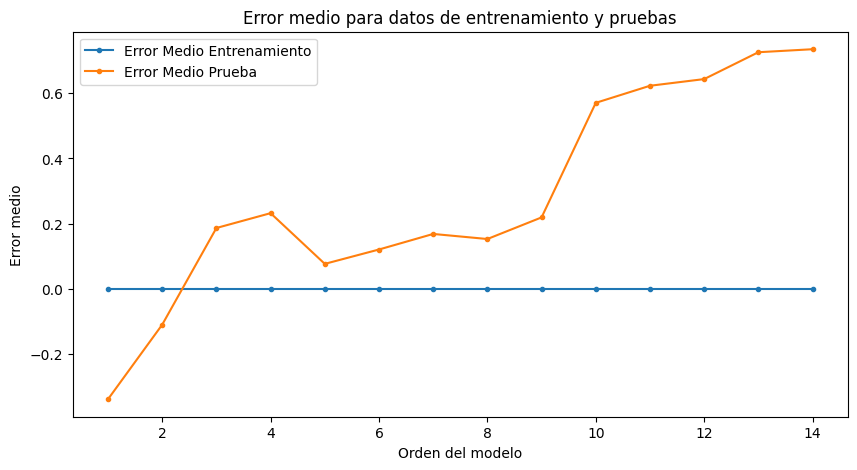

In [182]:
models_mean_error_train = []
models_mean_error_test = []
x = range(1, 15)
for i in x:
    model_mean_error = get_models_mean_error(i)
    models_mean_error_train.append(model_mean_error[0])
    models_mean_error_test.append(model_mean_error[1])

plt.figure(figsize=(10, 5))
plt.plot(x, models_mean_error_train, marker='.', linestyle='-', label='Error Medio Entrenamiento')
plt.plot(x, models_mean_error_test, marker='.', linestyle='-', label='Error Medio Prueba')
plt.title('Error medio para datos de entrenamiento y pruebas')
plt.xlabel('Orden del modelo')
plt.ylabel('Error medio')
plt.legend()

# Display the plot
plt.show()

En esta gráfica, se calcula el error medio para modelos ponimiales entre los ordenes 1 y 14. Lo primero que llama la atención, es que el error medio de los datos de entrenamiento siempre es 0, ya que este es precisamente el objetivo del modelo, encontrar una ecuación polinomial que cancele los errores del conjunto de datos de entrenamiento. 

Lo que interesa en esta situación, es apreciar el comportamiento de los datos de prueba. Podemos apreciar que, a grandes razgos, el modelo a mayor grado del modelo, este tiende a sobreestimar los datos del conjunto de prueba, comportamiento que se intensifica considerablemente a partir del modelo de grado 10.

También es interesante señalar que los modelos de grado 1 y 2, tienden a subestimar el valor del conjunto de datos de prueba.

Podemos encontrar un nivel de sesgo aceptable entre los grados 2 y 9, en los que se encuentra cierto grado de sobreestimación (a excepción del modelo de grado 2). 

### Varianza

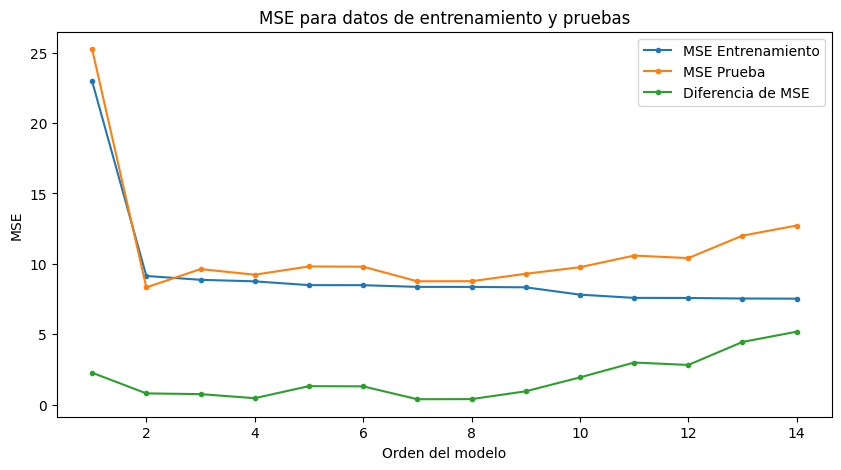

In [183]:
models_mse_train = []
models_mse_test = []
models_mse_dif = []

x = range(1, 15)
for i in x:
    model_mse = get_models_mse(i)
    models_mse_train.append(model_mse[0])
    models_mse_test.append(model_mse[1])
    models_mse_dif.append(np.abs(model_mse[1] - model_mse[0]))

plt.figure(figsize=(10, 5))
plt.plot(x, models_mse_train, marker='.', linestyle='-', label='MSE Entrenamiento')
plt.plot(x, models_mse_test, marker='.', linestyle='-', label='MSE Prueba')
plt.plot(x, models_mse_dif, marker='.', linestyle='-', label='Diferencia de MSE')
plt.title('MSE para datos de entrenamiento y pruebas')
plt.xlabel('Orden del modelo')
plt.ylabel('MSE')
plt.legend()

plt.show()

Si endendemos la varianza como la dependencia que tiene el modelo de los datos de entrenamiento, podemos describirla como la diferencia de los errores entre las predicciones para el conjunto de enetrenamiento y prueba. Así podemos encontrar que los modelos entre orden 1 y 9 muestran valores razonables de diferencia de MSE, así podemos estimar a nuestro rango aceptable de varianza entre los ordenes 1 y 9, ya que a partir de este punto, encontramos una sobredependencia de los datos de entrenamiento que no permite  generalizar a los datos del conjunto de entranamiento.

### Ajuste del modelo

Tomando en cuenta las metricas anteriores, podemos estimar zonas de ajuste al modelo.

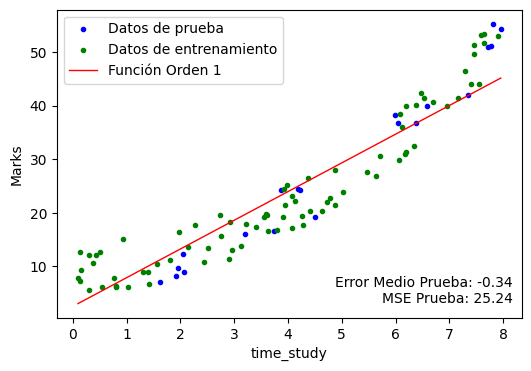

In [185]:
plotModel(1)

El modelo de orden 1, o lineal, resulta ser demasiado simple como para explicar de manera adecuada el comportamiento de los datos. Lo que resulta en un alto error cuadrático medio. Si bien el modelo tiene una varianza reducida, evidenciada por la similutud entre los errores cuadraticos medios de los conjuntos de entrenamiento y prueba, el nivel que tiene de error previene que se le considere como la mejor alternativa. En resumen, tenemos un caso de underfitting.

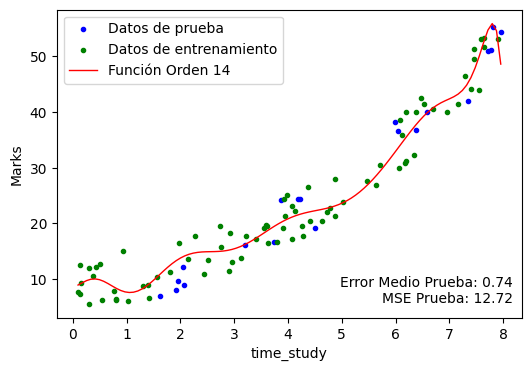

In [186]:
plotModel(14)

El modelo de orden 14 por otro lado, es un ejemplo de overfitting, ya que el modelo se ajusta a los datos de entrenamiento al punto de ser incapaz de generalizar a los datos de prueba de manera satisfactoria. Si bien el error en el conjunto de entrenamiento es minimo, se deberían considerar otras opciones que sean capaces de adaptarse de manera más adecuada a los datos de prueba.

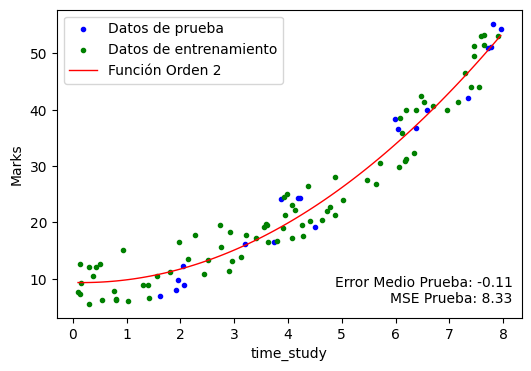

In [187]:
plotModel(2)

Nuestro modelo inicial de orden 2, resultó ser el modelo más apto al conseguir un equilibrio entre sesgo y varianza, logrando un nivel de error aceptable pero siendo capaz de generalizar a los datos del conjunto de prueba. Si bien no es el modelo que presenta lo mejores resultados, considero que es el más apropiado porque es el más simple de los modelos satisfactorios, y generalmente es preferible tener un modelo que tienda a lo simple que uno más complejo que se ajuste mejor a los datos.

## Conclusión

En conclusión, el modelo con el que iniciamos, una regresión polinomial de orden 2, resultó ser el modelo de mejor ajuste a nuestros datos. Sin embargo, analizar el desempeño de modelos de diferentes complejidades permitió reafirmar esta hipotesis con un mayor grado de seguridad, así como servir como un fructifero ejercicio en la comprensión del sesgo, varianza y ajuste de los modelos.

## Referencias

Kar, U. (2022, 6 enero). Concept of Machine learning | Polynomial regression | Errors: noise, bias, and variance | Splitting data into training and test set. Medium. https://medium.com/geekculture/concept-of-machine-learning-polynomial-regression-errors-noise-bias-and-variance-splitting-222193e2331f

Mottaghinejad, S. (2022, 7 enero). The intuition behind bias and variance - towards data science. Medium. https://towardsdatascience.com/bias-and-variance-but-what-are-they-really-ac539817e171

What is the difference between bias and variance? (2022, 19 julio). CORP-MIDS1 (MDS). https://www.mastersindatascience.org/learning/difference-between-bias-and-variance/